<a href="https://colab.research.google.com/github/TJEcomputer/AutoTradingSystem/blob/Anna/20201102_1103_LSTM_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LSTM 레이어 
- 장기 기억 의존 문제를 해결하기 위함


### 1. Simple RNN 예제 
- 먼저 simple RNN 을 통해, 어떤 문제점이 발생되는지 알아보자

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt

- 문제의 데이터셋(X)과 답(Y) 생성

In [ ]:
# 3000 개의 데이터셋 생성: 1개의 데이터셋에는 0~1에서의 숫자 100개가 랜덤으로 입력됨
X=[]
Y=[]
for i in range(3000):
  # 0~1 범위의 랜덤한 숫자 100개를 만듭니다
  lst = np.random.rand(100)
  # 마킹할 숫자 2개의 인덱스 뽑기
  idx = np.random.choice(100, 2, replace=False)
  # 마킹 인덱스가 저장된 원-핫 인코딩 벡터 생성
  zeros_ = np.zeros(100)
  zeros_[idx] = 1

  # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X에 저장
  X.append(np.array(list(zip(zeros_, lst))))

  # 마킹 인덱스가 1인값만 서로 곱해서 Y에 저장 : Y는 label 즉 답이 됨
  Y.append(np.prod(lst[idx]))

print(X[0], Y[0])

[[0.         0.60966926]
 [0.         0.89569097]
 [0.         0.38720366]
 [1.         0.72915365]
 [0.         0.08107682]
 [0.         0.62746469]
 [0.         0.2470832 ]
 [0.         0.49741218]
 [0.         0.06007894]
 [0.         0.75174209]
 [0.         0.20326797]
 [0.         0.88551574]
 [0.         0.59909357]
 [0.         0.07657857]
 [0.         0.6008064 ]
 [0.         0.9758859 ]
 [0.         0.72323433]
 [0.         0.44797183]
 [0.         0.24695948]
 [0.         0.33311771]
 [0.         0.14381634]
 [0.         0.04934423]
 [0.         0.82847907]
 [0.         0.21101157]
 [0.         0.76395468]
 [0.         0.57575872]
 [0.         0.56113437]
 [0.         0.53749822]
 [0.         0.4945384 ]
 [0.         0.86415581]
 [0.         0.39681124]
 [0.         0.8604965 ]
 [0.         0.6090603 ]
 [0.         0.13510618]
 [0.         0.14120964]
 [0.         0.05779595]
 [0.         0.4215842 ]
 [0.         0.21569355]
 [0.         0.36637386]
 [0.         0.19886215]


In [ ]:
# 앞선 간단한 예제에 비해 어렵기 때문에 SimpleRNN 레이어의 뉴런수도 늘리고 RNN 레이어를 두 층으로 겹친 모델 구조를 사용해보기 p.188 그림 참고
model = tf.keras.Sequential([
                               tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape = [100,2])   # RNN레이어를 겹치기 위해 첫번째 레이어에서 return_sequences=True로 지정 => 레이어 출력을 그대로 다음 레이어에 넘겨줌
                             , tf.keras.layers.SimpleRNN(units=30)
                             , tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 학습 시키기

# 어레이로 타입 변환
X = np.array(X)
Y = np.array(Y)

In [ ]:
X.shape

(3000, 100, 2)

In [ ]:
Y.shape

(3000,)

In [ ]:
Y[5]

0.28149021952336023

- 여기서 지정되는 검증데이터는 훈련데이터와 별개로, 네트워크의 가중치에 영향을 미치지 않는다.

In [ ]:
# 2560개의 데이터만 학습시키기. 검증데이터는 20% 로 지정
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 5s 83ms/step - loss: 0.0887 - val_loss: 0.0479
Epoch 2/100
64/64 [==============================] - 5s 81ms/step - loss: 0.0514 - val_loss: 0.0482
Epoch 3/100
64/64 [==============================] - 5s 81ms/step - loss: 0.0513 - val_loss: 0.0480
Epoch 4/100
64/64 [==============================] - 5s 82ms/step - loss: 0.0553 - val_loss: 0.0481
Epoch 5/100
64/64 [==============================] - 5s 80ms/step - loss: 0.0515 - val_loss: 0.0467
Epoch 6/100
64/64 [==============================] - 5s 80ms/step - loss: 0.0503 - val_loss: 0.0468
Epoch 7/100
64/64 [==============================] - 5s 81ms/step - loss: 0.0502 - val_loss: 0.0523
Epoch 8/100
64/64 [==============================] - 5s 85ms/step - loss: 0.0510 - val_loss: 0.0508
Epoch 9/100
64/64 [==============================] - 5s 82ms/step - loss: 0.0517 - val_loss: 0.0490
Epoch 10/100
64/64 [==============================] - 5s 82ms/step - loss: 0.0504 - val_loss: 0.0498

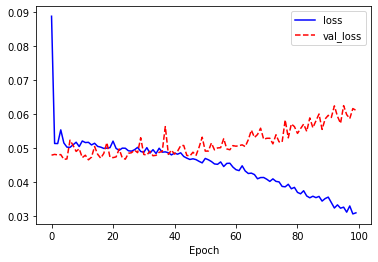

In [ ]:
# 경향 파악 위해 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

- 전형적인 과적합 그래프가 나온다.
- 즉 학습시킨 데이터는 학습을 반복할수록(가중치 변경이 반복) loss가 줄어들지만, valudation data는 불안정하다. 


In [ ]:
#  전체 테스트 데이터 결과 확인

model.evaluate(X[2560:], Y[2560:])

14/14 [==============================] - 0s 12ms/step - loss: 0.0669


0.06693551689386368

- 100번째 epoch의 val_loss 인  0.0611 보다도 높다.  => 네트워크가 학습 과정에서 보지 못했던 데이터에 대해서 잘 예측하지 못한다

In [ ]:
pred[0][0]

0.10519735

In [ ]:
# 5개 테스트 데이터에 대한 예측  표시
pred = model.predict(X[2560:2560+5])
for i in range(5):
  print(Y[2560+i],'\t', pred[i][0], '\tdiff:', abs(pred[i][0]-Y[2560+i]))

# 전체 테스트 데이터에 대한 정확도 확인 (오차가 0.04 이상인 경우 오답으로 처리)
prediction = model.predict(X[2560:])
# 오차가 0.04인경우 cnt할 변수 fail 선언
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0]-Y[2560+i])  > 0.04:
    fail +=1
print('correctness: ', (440-fail)/440*100, '%')


0.18982348094415957 	 0.10519735 	diff: 0.08462613324356372
0.674710649073077 	 0.23314637 	diff: 0.4415642796158321
0.6782049608977108 	 0.33183023 	diff: 0.34637472756221577
0.019594320405173397 	 0.107528545 	diff: 0.08793422455723277
0.014357379445345635 	 0.18322265 	diff: 0.1688652720362828
correctness:  10.227272727272728 %


- 10% 정도의 정확도로 정확도가 매우 낮다


## 2. LSTM 레이어로 동일한 문제를 풀어보자

In [ ]:
import tensorflow as tf

In [ ]:
# 모델 정의
model = tf.keras.Sequential([
                               tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2])
                             , tf.keras.layers.LSTM(units=30)
                             , tf.keras.layers.Dense(1)
])

metrics: List of metrics to be evaluated by the model during training
      and testing. Each of this can be a string (name of a built-in
      function), function or a tf.keras.metrics.Metric instance. See
      tf.keras.metrics. Typically you will use metrics=['accuracy']. A
      function is any callable with the signature result = fn(y_true,
      y_pred). To specify different metrics for different outputs of a
      multi-output model, you could also pass a dictionary, such as
        metrics={'output_a': 'accuracy', 'output_b': ['accuracy', 'mse']}.
          You can also pass a list (len = len(outputs)) of lists of metrics
          such as metrics=[['accuracy'], ['accuracy', 'mse']] or
          metrics=['accuracy', ['accuracy', 'mse']]. When you pass the
          strings 'accuracy' or 'acc', we convert this to one of
          tf.keras.metrics.BinaryAccuracy,
          tf.keras.metrics.CategoricalAccuracy,
          tf.keras.metrics.SparseCategoricalAccuracy based on the loss
          function used and the model output shape. We do a similar
          conversion for the strings 'crossentropy' and 'ce' as well.

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=None )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


- param# 가 훨씬 늘어있다(상대적으로 복잡한 구조)
- 그러나 데이터나 다른 조건들은 모두 동일, 즉 SimpleRNN을 LSTM으로 바꾼 것 외에는 없다
- 여기서는 정확도를 사용자가 지정한 기준에 따라 나오기 때문에 metrics 미지정 (metrics=None) 
- metrics 로 인해 회귀와 분류가 나눠지게 될것이다.Typically you will use metrics=['accuracy']

In [ ]:
# 여기서 지정되는 검증데이터는 훈련데이터와 별개로, 네트워크의 가중치에 영향을 미치지 않는다.
history = model.fit(X[:2560],Y[:2560], epochs=100, validation_split=0.2, batch_size=None)

Epoch 1/100
64/64 [==============================] - 1s 20ms/step - loss: 0.0547 - val_loss: 0.0463
Epoch 2/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0501 - val_loss: 0.0462
Epoch 3/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0506 - val_loss: 0.0463
Epoch 4/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0499 - val_loss: 0.0464
Epoch 5/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0498 - val_loss: 0.0462
Epoch 6/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0499 - val_loss: 0.0463
Epoch 7/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0500 - val_loss: 0.0468
Epoch 8/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0499 - val_loss: 0.0463
Epoch 9/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0497 - val_loss: 0.0463
Epoch 10/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0494 - val_loss: 0.0473

- 이거 왜 속도도 더 빠르지?

- batch_size: learning rate 와 같은 개념인듯 -batch_size will default to 32.
        Integer or None.
        Number of samples per gradient update.
        If unspecified, batch_size will default to 32.
        Do not specify the batch_size if your data is in the
        form of datasets, generators, or keras.utils.Sequence instances
        (since they generate batches).

In [ ]:
# 학습된 객체의 history 속성안에 딕셔너리 구조로 loss와 val_loss를 확인할수 있다.
history.history.keys()

dict_keys(['loss', 'val_loss'])

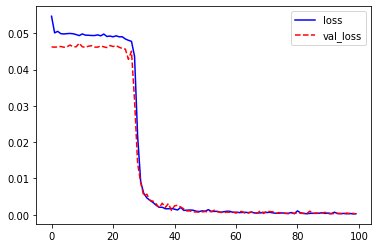

In [ ]:
# 시각화
plt.plot(history.history['loss'], 'b-', label ='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()

- loss와 val_loss 모두 매우 작은값으로 수렴하고 있다.

In [ ]:
# 테스트 데이터로 확인하기
model.evaluate(X[2560:], Y[2560:])

14/14 [==============================] - 0s 5ms/step - loss: 2.0366e-04


0.00020366256649140269

- 테스트 데이터에 대해서도 0.0002와 같이 매우 작은 val_loss 를 보인다

In [ ]:
# 5개 테스트 데이터에 대한 예측  표시
pred = model.predict(X[2560:2560+5])
for i in range(5):
  print(Y[2560+i],'\t', pred[i][0], '\tdiff:', abs(pred[i][0]-Y[2560+i]))

# 전체 테스트 데이터에 대한 정확도 확인 (오차가 0.04 이상인 경우 오답으로 처리)
prediction = model.predict(X[2560:])
# 오차가 0.04인경우 cnt할 변수 fail 선언
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0]-Y[2560+i])  > 0.04:
    fail +=1
print('correctness: ', (440-fail)/440*100, '%')

0.18982348094415957 	 0.17889759 	diff: 0.010925891499045437
0.674710649073077 	 0.677333 	diff: 0.002622348249005535
0.6782049608977108 	 0.65875083 	diff: 0.019454128816869698
0.019594320405173397 	 0.017818503 	diff: 0.0017758173233748432
0.014357379445345635 	 -0.0051757544 	diff: 0.019533133873255486
correctness:  98.18181818181819 %


- 정확도는 98% 로 매우 높게 나왔다

## 뉴런 개수를 늘려보자 ( unit 개수)

In [ ]:
# 뉴런 개수를 50개로 늘려보자
model = tf.keras.Sequential([
                               tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=[100,2])
                             , tf.keras.layers.LSTM(units=50)
                             , tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100, 50)           10600     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 30,851
Trainable params: 30,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X[:2560],Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 1s 20ms/step - loss: 0.0525 - val_loss: 0.0462
Epoch 2/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0502 - val_loss: 0.0465
Epoch 3/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0504 - val_loss: 0.0462
Epoch 4/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0501 - val_loss: 0.0465
Epoch 5/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0498 - val_loss: 0.0464
Epoch 6/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0503 - val_loss: 0.0477
Epoch 7/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0497 - val_loss: 0.0465
Epoch 8/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0499 - val_loss: 0.0463
Epoch 9/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0498 - val_loss: 0.0465
Epoch 10/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0496 - val_loss: 0.0464

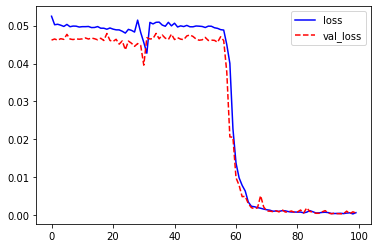

In [ ]:
# 시각화
plt.plot(history.history['loss'], 'b-', label ='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()

In [ ]:
# 테스트 데이터로 확인하기
model.evaluate(X[2560:], Y[2560:])

14/14 [==============================] - 0s 6ms/step - loss: 5.7852e-04


0.000578524312004447

In [ ]:
# 5개 테스트 데이터에 대한 예측  표시
pred = model.predict(X[2560:2560+5])
for i in range(5):
  print(Y[2560+i],'\t', pred[i][0], '\tdiff:', abs(pred[i][0]-Y[2560+i]))

# 전체 테스트 데이터에 대한 정확도 확인 (오차가 0.04 이상인 경우 오답으로 처리)
prediction = model.predict(X[2560:])
# 오차가 0.04인경우 cnt할 변수 fail 선언
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0]-Y[2560+i])  > 0.04:
    fail +=1
print('correctness: ', (440-fail)/440*100, '%')

0.18982348094415957 	 0.1541388 	diff: 0.03568467746210391
0.674710649073077 	 0.6779052 	diff: 0.003194552838849285
0.6782049608977108 	 0.6774666 	diff: 0.0007383895666865925
0.019594320405173397 	 0.030603088 	diff: 0.011008768033337498
0.014357379445345635 	 0.016682535 	diff: 0.002325155964581733
correctness:  91.5909090909091 %


- 오히려 정확도가 90% 수준으로 떨어졌다.
- 어느정도 이상의 뉴런개수가 넘어가면 그 이상으로 올리면 오히려 과적합이 발생하는 것 같다
    - ex)뉴런 개수 30개
    64/64 [==============================] - 1s 10ms/step - loss: 2.2728e-04 - val_loss: 3.9602e-04 
    Epoch 100/100
    64/64 [==============================] - 1s 10ms/step - loss: 2.7641e-04 - val_loss: 2.3873e-04

    - ex) 뉴런 개수 50개:
    /64 [==============================] - 1s 11ms/step - loss: 3.6823e-04 - val_loss: 9.2639e-04
    Epoch 100/100
    64/64 [==============================] - 1s 11ms/step - loss: 6.8664e-04 - val_loss: 6.0298e-04


- 뉴런개수가 늘어나면 epoch 수도 늘려서 해봐야할듯

#### epoch 수를 늘리기(뉴런 + epoch 수 늘리기)

In [ ]:
# 뉴런 개수를 50개로 늘려보자
model = tf.keras.Sequential([
                               tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=[100,2])
                             , tf.keras.layers.LSTM(units=50)
                             , tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 100, 50)           10600     
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 30,851
Trainable params: 30,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# epoch 수 200으로 증가
history = model.fit(X[:2560],Y[:2560], epochs=200, validation_split=0.2)

Epoch 1/200
64/64 [==============================] - 1s 20ms/step - loss: 0.0537 - val_loss: 0.0476
Epoch 2/200
64/64 [==============================] - 1s 11ms/step - loss: 0.0502 - val_loss: 0.0463
Epoch 3/200
64/64 [==============================] - 1s 11ms/step - loss: 0.0500 - val_loss: 0.0477
Epoch 4/200
64/64 [==============================] - 1s 11ms/step - loss: 0.0502 - val_loss: 0.0470
Epoch 5/200
64/64 [==============================] - 1s 11ms/step - loss: 0.0501 - val_loss: 0.0462
Epoch 6/200
64/64 [==============================] - 1s 11ms/step - loss: 0.0500 - val_loss: 0.0465
Epoch 7/200
64/64 [==============================] - 1s 11ms/step - loss: 0.0496 - val_loss: 0.0471
Epoch 8/200
64/64 [==============================] - 1s 11ms/step - loss: 0.0494 - val_loss: 0.0471
Epoch 9/200
64/64 [==============================] - 1s 11ms/step - loss: 0.0497 - val_loss: 0.0464
Epoch 10/200
64/64 [==============================] - 1s 11ms/step - loss: 0.0496 - val_loss: 0.0464

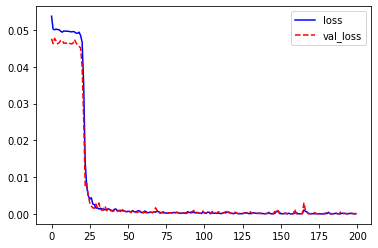

In [ ]:
# 시각화
plt.plot(history.history['loss'], 'b-', label ='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()

In [ ]:
# 테스트 데이터로 확인하기
model.evaluate(X[2560:], Y[2560:])
# 5개 테스트 데이터에 대한 예측  표시
pred = model.predict(X[2560:2560+5])
for i in range(5):
  print(Y[2560+i],'\t', pred[i][0], '\tdiff:', abs(pred[i][0]-Y[2560+i]))

# 전체 테스트 데이터에 대한 정확도 확인 (오차가 0.04 이상인 경우 오답으로 처리)
prediction = model.predict(X[2560:])
# 오차가 0.04인경우 cnt할 변수 fail 선언
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0]-Y[2560+i])  > 0.04:
    fail +=1
print('correctness: ', (440-fail)/440*100, '%')

14/14 [==============================] - 0s 5ms/step - loss: 2.2158e-04
0.18982348094415957 	 0.20603392 	diff: 0.016210434337136204
0.674710649073077 	 0.68897295 	diff: 0.014262300908612469
0.6782049608977108 	 0.6859547 	diff: 0.00774972908184246
0.019594320405173397 	 0.01709038 	diff: 0.002503940213370418
0.014357379445345635 	 0.01109466 	diff: 0.003262719878466363
correctness:  99.54545454545455 %


- epoch 수도 함께 늘리니 뉴런개수가 늘어난 효과가 있었다 : 99.5454%

## 활성화 함수를 변경해보자 :tanh => ReLU
-  디폴트 함수 값 참조
tf.keras.layers.LSTM(units, activation='tanh', recurrent_activation='sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=2, return_sequences=False, return_state=False, go_backwards=False, stateful=False, time_major=False, unroll=False, **kwargs)

In [ ]:
# 활성화 함수 변경
model = tf.keras.Sequential([
                               tf.keras.layers.LSTM(units=30, activation='relu' ,return_sequences=True, input_shape=[100,2])
                             , tf.keras.layers.LSTM(units=30)
                             , tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 30)           3960      
_________________________________________________________________
lstm_5 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X[:2560],Y[:2560], epochs=100, validation_split=0.2)

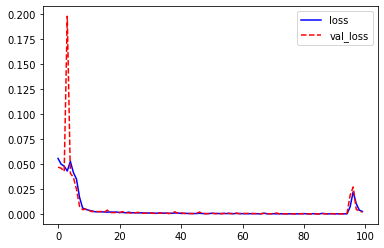

In [ ]:
# 시각화
plt.plot(history.history['loss'], 'b-', label ='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()

- epoch 수가 증가하면서 오히려 튀는 지점이 생겨났다. early stopping 을 주는 것이 모델 신뢰성 측면에서도 더 좋겠다
- 즉 네트워크가 과적합 되지 않도록 학습 도중에 끼어들어(Callback함수) 학습을 중단시켜야 한다

### Callback 함수 적용(Earlystopping)

In [ ]:
# 모델은 앞과 동일
model = tf.keras.Sequential([
                               tf.keras.layers.LSTM(units=30, activation='relu' ,return_sequences=True, input_shape=[100,2])
                             , tf.keras.layers.LSTM(units=30)
                             , tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100, 30)           3960      
_________________________________________________________________
lstm_9 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fitting 시 callbacks 옵션 지정
history = model.fit(X[:2560],Y[:2560], epochs=100, validation_split=0.2
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')])

Epoch 1/100
64/64 [==============================] - 4s 69ms/step - loss: 0.0546 - val_loss: 0.0460
Epoch 2/100
64/64 [==============================] - 4s 65ms/step - loss: 0.0494 - val_loss: 0.0447
Epoch 3/100
64/64 [==============================] - 4s 64ms/step - loss: 0.0471 - val_loss: 0.0414
Epoch 4/100
64/64 [==============================] - 4s 64ms/step - loss: 0.0429 - val_loss: 0.0348
Epoch 5/100
64/64 [==============================] - 4s 64ms/step - loss: 0.0194 - val_loss: 0.0097
Epoch 6/100
64/64 [==============================] - 4s 64ms/step - loss: 0.0077 - val_loss: 0.0061
Epoch 7/100
64/64 [==============================] - 4s 65ms/step - loss: 0.0095 - val_loss: 0.0047
Epoch 8/100
64/64 [==============================] - 4s 64ms/step - loss: 0.0048 - val_loss: 0.0044
Epoch 9/100
64/64 [==============================] - 4s 64ms/step - loss: 0.0044 - val_loss: 0.0037
Epoch 10/100
64/64 [==============================] - 4s 64ms/step - loss: 0.0034 - val_loss: 0.0038

- 99번째 epoch에서 멈췄다

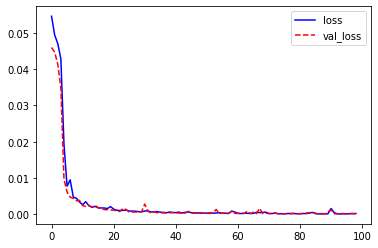

In [ ]:
# 시각화
plt.plot(history.history['loss'], 'b-', label ='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()

- 모든 조건이 같다고 해서 항상 같은 결과를 내놓지 않는다. 즉 값이 튈때도 있고, 안 튈때도 있다 => 자연적인 실험 테스트와 같은 느낌이네

In [ ]:
# 테스트 데이터로 확인하기
model.evaluate(X[2560:], Y[2560:])

14/14 [==============================] - 0s 14ms/step - loss: 1.4028e-04


0.0001402788911946118

In [ ]:
# 5개 테스트 데이터에 대한 예측  표시
pred = model.predict(X[2560:2560+5])
for i in range(5):
  print(Y[2560+i],'\t', pred[i][0], '\tdiff:', abs(pred[i][0]-Y[2560+i]))

# 전체 테스트 데이터에 대한 정확도 확인 (오차가 0.04 이상인 경우 오답으로 처리)
prediction = model.predict(X[2560:])
# 오차가 0.04인경우 cnt할 변수 fail 선언
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0]-Y[2560+i])  > 0.04:
    fail +=1
print('correctness: ', (440-fail)/440*100, '%')

0.18982348094415957 	 0.20738703 	diff: 0.017563549180504734
0.674710649073077 	 0.674818 	diff: 0.00010733026270792756
0.6782049608977108 	 0.6718953 	diff: 0.006309635713842354
0.019594320405173397 	 0.025730185 	diff: 0.006135864805531407
0.014357379445345635 	 0.022233136 	diff: 0.007875756552903419
correctness:  99.54545454545455 %


#### earlystopping : 5

In [ ]:
# 모델은 앞과 동일
model = tf.keras.Sequential([
                               tf.keras.layers.LSTM(units=30, activation='relu' ,return_sequences=True, input_shape=[100,2])
                             , tf.keras.layers.LSTM(units=30)
                             , tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fitting 시 callbacks 옵션 지정
history = model.fit(X[:2560],Y[:2560], epochs=100, validation_split=0.2
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

Epoch 1/100
64/64 [==============================] - 4s 67ms/step - loss: 0.0526 - val_loss: 0.0489
Epoch 2/100
64/64 [==============================] - 4s 61ms/step - loss: 0.0479 - val_loss: 0.0483
Epoch 3/100
64/64 [==============================] - 4s 61ms/step - loss: 0.0460 - val_loss: 0.0461
Epoch 4/100
64/64 [==============================] - 4s 63ms/step - loss: 0.0435 - val_loss: 0.0436
Epoch 5/100
64/64 [==============================] - 4s 63ms/step - loss: 0.0402 - val_loss: 0.0356
Epoch 6/100
64/64 [==============================] - 4s 63ms/step - loss: 0.0260 - val_loss: 0.0126
Epoch 7/100
64/64 [==============================] - 4s 62ms/step - loss: 0.0132 - val_loss: 0.0115
Epoch 8/100
64/64 [==============================] - 4s 62ms/step - loss: 0.0070 - val_loss: 0.0049
Epoch 9/100
64/64 [==============================] - 4s 62ms/step - loss: 0.0072 - val_loss: 0.0051
Epoch 10/100
64/64 [==============================] - 4s 61ms/step - loss: 0.0049 - val_loss: 0.0036

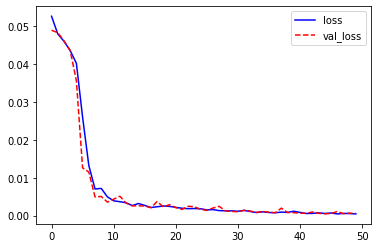

In [ ]:
# 시각화
plt.plot(history.history['loss'], 'b-', label ='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()

In [ ]:
# 테스트 데이터로 확인하기
model.evaluate(X[2560:], Y[2560:])
# 5개 테스트 데이터에 대한 예측  표시
pred = model.predict(X[2560:2560+5])
for i in range(5):
  print(Y[2560+i],'\t', pred[i][0], '\tdiff:', abs(pred[i][0]-Y[2560+i]))

# 전체 테스트 데이터에 대한 정확도 확인 (오차가 0.04 이상인 경우 오답으로 처리)
prediction = model.predict(X[2560:])
# 오차가 0.04인경우 cnt할 변수 fail 선언
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0]-Y[2560+i])  > 0.04:
    fail +=1
print('correctness: ', (440-fail)/440*100, '%')

14/14 [==============================] - 0s 14ms/step - loss: 5.2447e-04
0.12233698531608188 	 0.11141117 	diff: 0.010925816144748565
0.3885990175021843 	 0.37104884 	diff: 0.017550179602022542
0.1365916113151087 	 0.13419762 	diff: 0.0023939887774957758
0.02086098511972038 	 0.0148925595 	diff: 0.005968425621171874
0.8187965430904066 	 0.7858282 	diff: 0.032968369929853636
correctness:  93.18181818181817 %


- ReLU 로 동일하게 돌렸음에도 첫번째에는 81%의 정확도(왜냐면 모델이 튀어서)로 tanh(95%) 보다 낮은 정확도가 나왔고 
- 동일한 조건의 두번째 돌린 모델에는 99% 이상의 정확도가 나왔다. (earlystoping 되긴 했지만 99번째 epoch 까지 돌아갔음으로 큰 차이는 없었을 텐데, 어쨌든 모델이 튀지 않아서 좋은 결과가 나왔다.)

- 어떤 활성화 함수가 항상 좋거나 나쁘거나 하지 않네. tanh가 상대적으로 낮은 결과를 보이지만 대체적으로 안정적일수도 있고,
ReLU의 어떤 모델객체는 exceptional하게 좋은 결과를 얻지만, 동일한 조건임에도 어쩔때는 tanh보다 형편없을수도 있네 


- 모든 조건이 같다고 해서 항상 같은 결과를 내놓지 않는다. 즉 값이 튈때도 있고, 안 튈때도 있다 => 자연적인 실험 테스트와 같은 느낌
 => 이 말은 동일 조건을 돌려도 다른 모델이 생성된다는 말이네 -> physical한 실험처럼 모수를 늘려서 돌린 후 최고의 결과를 갖는 객체를 저장해야 할듯

- 이것은 cpu가 가중치를 얻을 때 어디로 갈지 정해져 있지 않아서 그런가? 아니면 초기 가중치 지정이 랜덤하기 때문에 그런 결과가 나오는 것이 가장 설득력있겟다.

- early stopping 도 적절한 값을 지정해야 한다. 
 (ex) 값이 3 : 81%, 5:61%, 10 : 99% 의 정확도가 나왔다. 즉 선형적인 증가세가 아니다

In [ ]:
# 모델은 앞과 동일
model = tf.keras.Sequential([
                               tf.keras.layers.LSTM(units=30, activation='relu' ,return_sequences=True, input_shape=[100,2])
                             , tf.keras.layers.LSTM(units=30)
                             , tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 100, 30)           3960      
_________________________________________________________________
lstm_15 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# earlystopping 3로 바꿔지정
history = model.fit(X[:2560],Y[:2560], epochs=100, validation_split=0.2
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/100
64/64 [==============================] - 4s 67ms/step - loss: 0.0512 - val_loss: 0.0472
Epoch 2/100
64/64 [==============================] - 4s 61ms/step - loss: 0.0488 - val_loss: 0.0431
Epoch 3/100
64/64 [==============================] - 4s 61ms/step - loss: 0.0429 - val_loss: 0.0250
Epoch 4/100
64/64 [==============================] - 4s 62ms/step - loss: 0.0115 - val_loss: 0.0073
Epoch 5/100
64/64 [==============================] - 4s 62ms/step - loss: 0.0104 - val_loss: 0.0122
Epoch 6/100
64/64 [==============================] - 4s 62ms/step - loss: 0.0101 - val_loss: 0.0054
Epoch 7/100
64/64 [==============================] - 4s 62ms/step - loss: 0.0058 - val_loss: 0.0042
Epoch 8/100
64/64 [==============================] - 4s 62ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 9/100
64/64 [==============================] - 4s 62ms/step - loss: 0.0046 - val_loss: 0.0029
Epoch 10/100
64/64 [==============================] - 4s 62ms/step - loss: 0.0036 - val_loss: 0.0051

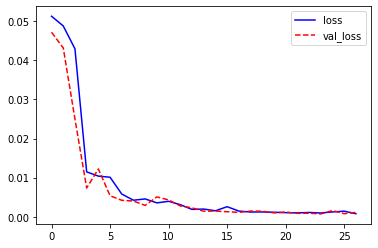

In [ ]:
# 시각화
plt.plot(history.history['loss'], 'b-', label ='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()

In [ ]:
# 테스트 데이터로 확인하기
model.evaluate(X[2560:], Y[2560:])
# 5개 테스트 데이터에 대한 예측  표시
pred = model.predict(X[2560:2560+5])
for i in range(5):
  print(Y[2560+i],'\t', pred[i][0], '\tdiff:', abs(pred[i][0]-Y[2560+i]))

# 전체 테스트 데이터에 대한 정확도 확인 (오차가 0.04 이상인 경우 오답으로 처리)
prediction = model.predict(X[2560:])
# 오차가 0.04인경우 cnt할 변수 fail 선언
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0]-Y[2560+i])  > 0.04:
    fail +=1
print('correctness: ', (440-fail)/440*100, '%')

14/14 [==============================] - 0s 15ms/step - loss: 0.0013
0.18982348094415957 	 0.1884426 	diff: 0.0013808781905203515
0.674710649073077 	 0.6286463 	diff: 0.04606433492894246
0.6782049608977108 	 0.5931514 	diff: 0.08505357034519001
0.019594320405173397 	 0.04436575 	diff: 0.024771428357911015
0.014357379445345635 	 0.01852893 	diff: 0.004171551397530799
correctness:  81.81818181818183 %


-  현재까지 제일 좋은 성능을 가지는 모델 (뉴런 개수는 모두 30)
1. ReLU, earlystopping = 10 : 99%
2. tanh, epoch =100(earlysotpping 미지정) : 98%

## 11/3 여기부터~
X,Y 데이터셋 리셋됨 - 데이터 달라짐

## 최적화 함수 변경 'Adam' ->'rmsprop'

- Adam method는 Adagrad + RMSProp의 장점을 섞어 놓은 것
- RMSProp : 세밀하게 학습하되 상황을 보며 정도를 정하자

In [ ]:
# 모델은 앞과 동일
model = tf.keras.Sequential([
                               tf.keras.layers.LSTM(units=30, activation='relu' ,return_sequences=True, input_shape=[100,2])
                             , tf.keras.layers.LSTM(units=30)
                             , tf.keras.layers.Dense(1)
])

# optimizer : 'adam' => 'rmsprop' 으로 변경
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 30)           3960      
_________________________________________________________________
lstm_5 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# earlystopping 미지정
history = model.fit(X[:2560],Y[:2560], epochs=100, validation_split=0.2)
     #               ,callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')])

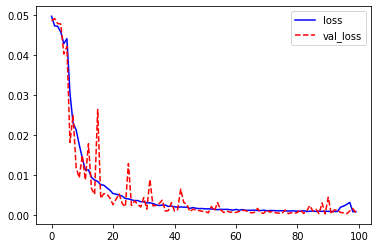

In [ ]:
# 시각화
plt.plot(history.history['loss'], 'b-', label ='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()

In [ ]:
# 테스트 데이터로 확인하기
model.evaluate(X[2560:], Y[2560:])
# 5개 테스트 데이터에 대한 예측  표시
pred = model.predict(X[2560:2560+5])
for i in range(5):
  print(Y[2560+i],'\t', pred[i][0], '\tdiff:', abs(pred[i][0]-Y[2560+i]))

# 전체 테스트 데이터에 대한 정확도 확인 (오차가 0.04 이상인 경우 오답으로 처리)
prediction = model.predict(X[2560:])
# 오차가 0.04인경우 cnt할 변수 fail 선언
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0]-Y[2560+i])  > 0.04:
    fail +=1
print('correctness: ', (440-fail)/440*100, '%')

14/14 [==============================] - 0s 14ms/step - loss: 4.8684e-04
0.12233698531608188 	 0.11732796 	diff: 0.00500902697066867
0.3885990175021843 	 0.417498 	diff: 0.02889897501337968
0.1365916113151087 	 0.15291686 	diff: 0.016325252245567884
0.02086098511972038 	 0.0269792 	diff: 0.0061182154222527325
0.8187965430904066 	 0.83785564 	diff: 0.01905909398311023
correctness:  92.72727272727272 %


- rmsprop을 적용한 모델의 경우, 피팅시 val_loss가 불안정하게 떨어지고, 완성 모델의 정확도도 adam 에 비해 떨어졌다. (동일 학습 조건시) 

In [ ]:
# 모델은 앞과 동일
model = tf.keras.Sequential([
                               tf.keras.layers.LSTM(units=30, activation='relu' ,return_sequences=True, input_shape=[100,2])
                             , tf.keras.layers.LSTM(units=30)
                             , tf.keras.layers.Dense(1)
])

# optimizer : 'adam' 어제와 모델 구조 재현성 확인(랜덤 데이터셋이 달라졌음)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 30)           3960      
_________________________________________________________________
lstm_7 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# earlystopping 미지정
history = model.fit(X[:2560],Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 4s 67ms/step - loss: 0.0486 - val_loss: 0.0482
Epoch 2/100
64/64 [==============================] - 4s 61ms/step - loss: 0.0453 - val_loss: 0.0436
Epoch 3/100
64/64 [==============================] - 4s 62ms/step - loss: 0.0273 - val_loss: 0.0084
Epoch 4/100
64/64 [==============================] - 4s 61ms/step - loss: 0.0085 - val_loss: 0.0051
Epoch 5/100
64/64 [==============================] - 4s 62ms/step - loss: 0.0050 - val_loss: 0.0037
Epoch 6/100
64/64 [==============================] - 4s 62ms/step - loss: 0.0040 - val_loss: 0.0030
Epoch 7/100
64/64 [==============================] - 4s 61ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 8/100
64/64 [==============================] - 4s 61ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 9/100
64/64 [==============================] - 4s 61ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 10/100
64/64 [==============================] - 4s 61ms/step - loss: 0.0018 - val_loss: 0.0017

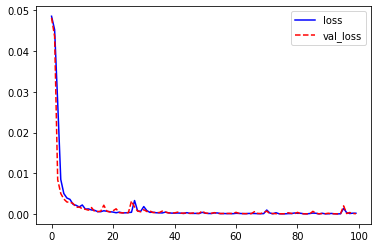

In [ ]:
# 시각화
plt.plot(history.history['loss'], 'b-', label ='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()

In [ ]:
# 테스트 데이터로 확인하기
model.evaluate(X[2560:], Y[2560:])
# 5개 테스트 데이터에 대한 예측  표시
pred = model.predict(X[2560:2560+5])
for i in range(5):
  print(Y[2560+i],'\t', pred[i][0], '\tdiff:', abs(pred[i][0]-Y[2560+i]))

# 전체 테스트 데이터에 대한 정확도 확인 (오차가 0.04 이상인 경우 오답으로 처리)
prediction = model.predict(X[2560:])
# 오차가 0.04인경우 cnt할 변수 fail 선언
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0]-Y[2560+i])  > 0.04:
    fail +=1
print('correctness: ', (440-fail)/440*100, '%')

14/14 [==============================] - 0s 14ms/step - loss: 7.9989e-05
0.12233698531608188 	 0.12588945 	diff: 0.0035524649955788884
0.3885990175021843 	 0.38288444 	diff: 0.005714574695940389
0.1365916113151087 	 0.13218674 	diff: 0.004404870678283129
0.02086098511972038 	 0.021173917 	diff: 0.00031293163738639954
0.8187965430904066 	 0.8316013 	diff: 0.012804778606828493
correctness:  99.77272727272727 %


- tanh 활성화 함수 사용시 재현성 확인하기(데이터가 바뀌었으므로)

In [ ]:
# 활성화 함수 변경
model = tf.keras.Sequential([
                               tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2])
                             , tf.keras.layers.LSTM(units=30)
                             , tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 100, 30)           3960      
_________________________________________________________________
lstm_11 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X[:2560],Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0529 - val_loss: 0.0493
Epoch 2/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0479 - val_loss: 0.0490
Epoch 3/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0479 - val_loss: 0.0492
Epoch 4/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0476 - val_loss: 0.0490
Epoch 5/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0473 - val_loss: 0.0502
Epoch 6/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0477 - val_loss: 0.0489
Epoch 7/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0474 - val_loss: 0.0491
Epoch 8/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0478 - val_loss: 0.0494
Epoch 9/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0475 - val_loss: 0.0489
Epoch 10/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0473 - val_loss: 0.0499
Epoch 11

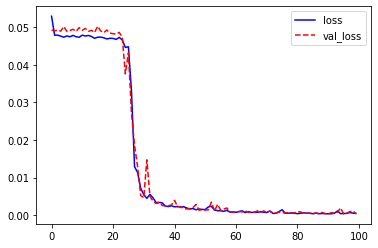

In [ ]:
# 시각화
plt.plot(history.history['loss'], 'b-', label ='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()

In [ ]:
# 테스트 데이터로 확인하기
model.evaluate(X[2560:], Y[2560:])
# 5개 테스트 데이터에 대한 예측  표시
pred = model.predict(X[2560:2560+5])
for i in range(5):
  print(Y[2560+i],'\t', pred[i][0], '\tdiff:', abs(pred[i][0]-Y[2560+i]))

# 전체 테스트 데이터에 대한 정확도 확인 (오차가 0.04 이상인 경우 오답으로 처리)
prediction = model.predict(X[2560:])
# 오차가 0.04인경우 cnt할 변수 fail 선언
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0]-Y[2560+i])  > 0.04:
    fail +=1
print('correctness: ', (440-fail)/440*100, '%')

14/14 [==============================] - 0s 5ms/step - loss: 5.1296e-04
0.12233698531608188 	 0.13194156 	diff: 0.009604571614460114
0.3885990175021843 	 0.41105053 	diff: 0.022451510785703288
0.1365916113151087 	 0.15852457 	diff: 0.02193296153416499
0.02086098511972038 	 0.021639489 	diff: 0.0007785035177269757
0.8187965430904066 	 0.791201 	diff: 0.02759554764515515
correctness:  96.36363636363636 %


### 정리(엑셀 파일을 확인할것)
- SimpleRNN 을 이용시 정확도가 매우 떨어졌던 문제를 LSTM을 사용하면 매우 높은 수준의 정확도로 풀수 있었다
- LSTM 파라미터 : 
  1. Activation = 'relu' : 디폴트인 tanh 에 비해 속도는 다소 느리나, 99% 이상의 정확도를 얻은 경우는 모두 relu를 사용한 경우였다.
  2. units = 30 : 기본적으로 뉴런의 개수가 많아지면 똑똑해진다.
  그러나 뉴런의 개수가 많아지면, 동시에 학습 횟수 epochs도 늘려줘야 효과적이다.
  아니면 오히려 성능이 떨어진다.
  또한 너무 많은 뉴런의 개수는 과적합 우려되기도 하지만 실험적으로 확인하진 못했다.
    
  3. optimizer = 'adam' : 'rmsprop'에 비해 안정적으로 val_loss 가 떨어진다.
  4. earlystopping = 적절한 값을 찾아야 한다. 너무 적게 주면 성능은 떨어진다.
  
  
  comment : 모델은 같은 조건이더라도 돌릴때마다 결과가 약간씩 다르다. 3번씩은 돌려서 재현성을 확인해야 하겠다. 중요한 모델이나 시간이 걸리는 학습은 pickle을 이용해 객체를 저장해 두어야 겠다.